# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
from loguru import logger
import sys
os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

eegDataSet_filepath = "NiazyFMRI.edf"
motiondata_moosmann_filepath = "headmotiondata.tsv"
export_bids_path = "./bids_dir"

#logging configuration
logger.remove()
logger.add(sys.stderr, level="INFO")
logger.add("Facet.log", level="DEBUG")

#defining important parameters
window_size = 25
upsampling_factor = 10
relative_trigger_position = -0.01
relative_window_position = 0.5
moosmann_motion_threshold = 0.8
event_id_description_pairs={'trigger':1}
regex_trigger_annotation_filter = r'\btrigger\b' # Annotations with the description 'trigger' are considered as triggers
regex_trigger_event_filter = r'\b1\b' # Events with the value 1 are considered as triggers
unwanted_bad_channels = ['EKG', 'EMG', 'EOG', 'ECG'] # Channels with these names are considered as bad channels and not considered in the processing
evaluation_measures=["SNR", "RMS", "RMS2", "MEDIAN"]

f = Facet()


## Second Step import EEG Data

In [2]:
f.import_EEG(eegDataSet_filepath, rel_trig_pos=relative_trigger_position, upsampling_factor=upsampling_factor, bads=unwanted_bad_channels)
f.find_triggers(regex_trigger_event_filter)
eeg = f.get_EEG()

f.export_as_bids(event_id_description_pairs)
f.import_from_bids(rel_trig_pos=relative_trigger_position, bads=unwanted_bad_channels)
eeg = f.get_EEG()

f.plot_EEG(title="after import")

Importing EEG with:
Channels ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
Time Start: 0.0s
Time End: 162.99951171875s
Number of Samples: 333824
Sampling Frequency: 2048.0Hz
NiazyFMRI.edf
Stim-Kanäle gefunden: ['Status']
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
finding triggers
Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
Importing EEG with:
Channels ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', '

## Third Step Preprocessing

In [3]:
f.pre_processing()


Applying highpassfilter
Upsampling Data


## Fourth Step find triggers

In [4]:

f.find_triggers(regex_trigger_annotation_filter, idx=0) # Using Niazys data
f.get_analytics().print_analytics()
eeg = f.get_EEG()


No Stim-Channels found.

{'trigger': 1}
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
finding triggers


## Fourth step apply AAS

In [5]:
f.apply_AAS(window_size=window_size, rel_window_position=relative_window_position)

Averaging Channel Fp1 
Averaging Channel Fp2 
Averaging Channel F7 
Averaging Channel F3 
Averaging Channel Fz 
Averaging Channel F4 
Averaging Channel F8 
Averaging Channel T3 
Averaging Channel C3 
Averaging Channel Cz 
Averaging Channel C4 
Averaging Channel T4 
Averaging Channel T5 
Averaging Channel P3 
Averaging Channel Pz 
Averaging Channel P4 
Averaging Channel T6 
Averaging Channel O1 
Averaging Channel O2 
Averaging Channel AF4 
Averaging Channel AF3 
Averaging Channel FC2 
Averaging Channel FC1 
Averaging Channel CP1 
Averaging Channel CP2 
Averaging Channel PO3 
Averaging Channel PO4 
Averaging Channel FC6 
Averaging Channel FC5 
Averaging Channel CP5 


## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )
eeg = f.get_EEG()



Removing Artifact from Channel 0 
Removing Artifact from Channel 1 
Removing Artifact from Channel 2 
Removing Artifact from Channel 3 
Removing Artifact from Channel 4 
Removing Artifact from Channel 5 
Removing Artifact from Channel 6 
Removing Artifact from Channel 7 
Removing Artifact from Channel 8 
Removing Artifact from Channel 9 
Removing Artifact from Channel 10 
Removing Artifact from Channel 11 
Removing Artifact from Channel 12 
Removing Artifact from Channel 13 
Removing Artifact from Channel 14 
Removing Artifact from Channel 15 
Removing Artifact from Channel 16 
Removing Artifact from Channel 17 
Removing Artifact from Channel 18 
Removing Artifact from Channel 19 
Removing Artifact from Channel 20 
Removing Artifact from Channel 21 
Removing Artifact from Channel 22 
Removing Artifact from Channel 23 
Removing Artifact from Channel 24 
Removing Artifact from Channel 25 
Removing Artifact from Channel 26 
Removing Artifact from Channel 27 
Removing Artifact from Channel

## Sixth step Post-Processing

In [7]:
f.post_processing()

Downsampling Data
Applying lowpassfilter


## Seventh display the processed eeg data

In [8]:
f.plot_EEG(title="after lowpass")

## Eighth Evaluate Results

No Stim-Channels found.

{'trigger': 1}
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
finding triggers
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
Importing EEG with:
Channels ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
Time Start: 0.0s
Time End: 162.99951171875s
Number of Samples: 333824
Sampling Frequency: 2048.0Hz
NiazyFMRI.edf
Applying highpassfilter
Upsampling Data
Stim-Kanäle gefunden: ['Status']
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4

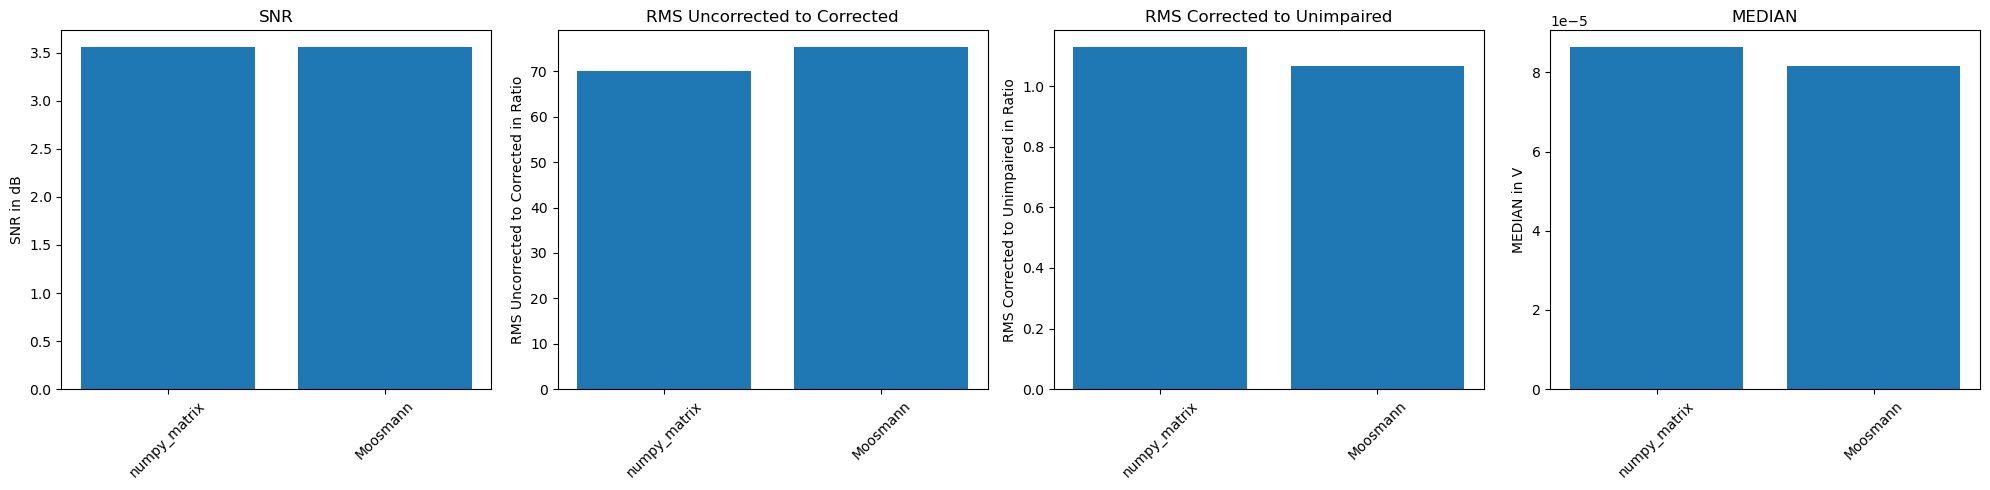

[{'Measure': 'SNR', 'Values': [3.5547081926438593, 3.5550452920440145], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [70.00221462222746, 75.28729378748463], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [1.1279627981802625, 1.0657311672571779], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [8.631424203120954e-05, 8.167492392330443e-05], 'Unit': 'V'}]
Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']


In [9]:
f.find_triggers(r'\btrigger\b') # Using Niazys data
eeg_python = f.get_eeg()
f.add_to_evaluate(eeg_python, name="numpy_matrix") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies

#apply moosmann
f.import_EEG(eegDataSet_filepath, rel_trig_pos=relative_trigger_position, bads=unwanted_bad_channels)
f.pre_processing()
f.find_triggers(regex_trigger_event_filter)
f.apply_Moosmann(file_path=motiondata_moosmann_filepath, threshold=moosmann_motion_threshold)
f.remove_artifacts()
f.post_processing()
f.find_triggers(regex_trigger_event_filter)
f.add_to_evaluate(f.get_eeg(), name="Moosmann")
results = f.evaluate(plot=True,measures=evaluation_measures)
logger.info(results)

f.export_as_bids(event_id=event_id_description_pairs, bids_path=export_bids_path)

